In [ ]:
import os
import cv2
import copy
import csv
import random
import pickle
import numpy as np
import pandas as pd
import itertools
from scipy.stats import randint
from itertools import cycle
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.sparse import csr_matrix
from scipy import stats

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import numpy as np

In [ ]:
# Import different classifiers
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from skimage.feature import hog, local_binary_pattern, greycomatrix, greycoprops

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder1="/content/drive/MyDrive/dataset_ML_wall_leakage/DRY_surface"
folder2="/content/drive/MyDrive/dataset_ML_wall_leakage/WET_Surface/"

In [ ]:

images = []
labels=[]
for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    print(path)
    a=cv2.imread(path)

    #resize image
    resize=(224,224)
    img=cv2.resize(a,resize)
    images.append(img)
    labels.append(0)



/content/drive/MyDrive/dataset_ML_wall_leakage/DRY_surface/Dry Surface1373.jpg
/content/drive/MyDrive/dataset_ML_wall_leakage/DRY_surface/Dry Surface1374.jpg
/content/drive/MyDrive/dataset_ML_wall_leakage/DRY_surface/Dry Surface1375.jpg
/content/drive/MyDrive/dataset_ML_wall_leakage/DRY_surface/Dry Surface1376.jpg
/content/drive/MyDrive/dataset_ML_wall_leakage/DRY_surface/Dry Surface1377.jpg
/content/drive/MyDrive/dataset_ML_wall_leakage/DRY_surface/Dry Surface1378.jpg
/content/drive/MyDrive/dataset_ML_wall_leakage/DRY_surface/Dry Surface1379.jpg
/content/drive/MyDrive/dataset_ML_wall_leakage/DRY_surface/Dry Surface1380.jpg
/content/drive/MyDrive/dataset_ML_wall_leakage/DRY_surface/Dry Surface1381.jpg
/content/drive/MyDrive/dataset_ML_wall_leakage/DRY_surface/Dry Surface1382.jpg
/content/drive/MyDrive/dataset_ML_wall_leakage/DRY_surface/Dry Surface1383.jpg
/content/drive/MyDrive/dataset_ML_wall_leakage/DRY_surface/Dry Surface1384.jpg
/content/drive/MyDrive/dataset_ML_wall_leakage/DRY_s

In [ ]:
print(images)

[array([[[217, 217, 217],
        [217, 217, 217],
        [214, 214, 214],
        ...,
        [220, 220, 220],
        [220, 220, 220],
        [222, 222, 222]],

       [[219, 219, 219],
        [214, 214, 214],
        [210, 210, 210],
        ...,
        [223, 223, 223],
        [226, 226, 226],
        [226, 226, 226]],

       [[224, 224, 224],
        [220, 220, 220],
        [220, 220, 220],
        ...,
        [226, 226, 226],
        [228, 228, 228],
        [228, 228, 228]],

       ...,

       [[116, 116, 116],
        [131, 131, 131],
        [104, 104, 104],
        ...,
        [123, 123, 123],
        [129, 129, 129],
        [130, 130, 130]],

       [[105, 105, 105],
        [121, 121, 121],
        [107, 107, 107],
        ...,
        [123, 123, 123],
        [101, 101, 101],
        [105, 105, 105]],

       [[103, 103, 103],
        [132, 132, 132],
        [108, 108, 108],
        ...,
        [ 65,  65,  65],
        [ 68,  68,  68],
        [ 89,  89,  89]

In [ ]:

images2 = []
labels2=[]
for filename in os.listdir(folder2):
    #path
    path=os.path.join(folder2,filename)
    print(path)
    a=cv2.imread(path)

    #resize image
    resize=(224,224)
    img=cv2.resize(a,resize)
    images2.append(img)
    labels2.append(1)


/content/drive/MyDrive/dataset_ML_wall_leakage/WET_Surface/Wet Surface1373.jpg
/content/drive/MyDrive/dataset_ML_wall_leakage/WET_Surface/Wet Surface1374.jpg
/content/drive/MyDrive/dataset_ML_wall_leakage/WET_Surface/Wet Surface1375.jpg
/content/drive/MyDrive/dataset_ML_wall_leakage/WET_Surface/Wet Surface1376.jpg
/content/drive/MyDrive/dataset_ML_wall_leakage/WET_Surface/Wet Surface1377.jpg
/content/drive/MyDrive/dataset_ML_wall_leakage/WET_Surface/Wet Surface1378.jpg
/content/drive/MyDrive/dataset_ML_wall_leakage/WET_Surface/Wet Surface1379.jpg
/content/drive/MyDrive/dataset_ML_wall_leakage/WET_Surface/Wet Surface1380.jpg
/content/drive/MyDrive/dataset_ML_wall_leakage/WET_Surface/Wet Surface1381.jpg
/content/drive/MyDrive/dataset_ML_wall_leakage/WET_Surface/Wet Surface1382.jpg
/content/drive/MyDrive/dataset_ML_wall_leakage/WET_Surface/Wet Surface1383.jpg
/content/drive/MyDrive/dataset_ML_wall_leakage/WET_Surface/Wet Surface1384.jpg
/content/drive/MyDrive/dataset_ML_wall_leakage/WET_S

In [ ]:
total_images=[]
total_images=images+images2
total_labels=[]
total_labels=labels+labels2

In [ ]:
def read(imag,lab):
  return np.array(imag),np.array(lab)


full_data_x, full_data_y =read(total_images,total_labels)

In [ ]:
print("dataset size : ", full_data_x.shape, full_data_y.shape)

dataset size :  (4745, 224, 224, 3) (4745,)


In [ ]:
data_x, test_x, data_y, test_y = train_test_split(full_data_x, full_data_y, test_size=0.2)

In [ ]:
with open("/content/drive/MyDrive/dataset_ML_wall_leakage/test.pkl", "wb") as f:
    pkl.dump([test_x, test_y], f)

In [ ]:
import pickle as pkl
with open("/content/drive/MyDrive/dataset_ML_wall_leakage/train.pkl", "wb") as f:
    pkl.dump([data_x, data_y], f)

In [ ]:
import pickle as pkl

with open("/content/drive/MyDrive/dataset_ML_wall_leakage/train.pkl", "rb") as f:

    data_x, data_y = pkl.load(f)

In [ ]:
with open("/content/drive/MyDrive/dataset_ML_wall_leakage/test.pkl", "rb") as f:

    test_x, test_y = pkl.load(f)

# DATA VISUALIZATION

In [ ]:
lbp_img = np.zeros((2, 224, 224))

In [ ]:
def save_feature(feature, name):
    # saving all our feature vectors in pickled file
    with open( '/content/drive/MyDrive/dataset_ML_wall_leakage/'+name + '.pkl', 'wb') as fp:
        pickle.dump(csr_matrix(feature), fp)

In [ ]:
def get_lbp(images, name='lbp', save=False):
    result = np.array([local_binary_pattern(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), 10, 3).flatten() for img in images])

    if save:
        save_feature(result, name)

    return result

In [ ]:
DRY_image = data_x[data_y == 0][0]
WET_img=data_x[data_y == 0][1]
classes=[]
classes.append(DRY_image)
classes.append(WET_img)


In [ ]:
for i in range(2):
   lbp_img[i] = local_binary_pattern(cv2.cvtColor(classes[i], cv2.COLOR_RGB2GRAY), 10, 3)

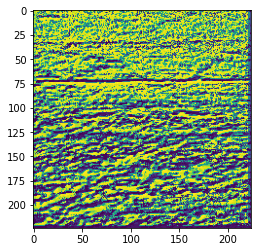

In [ ]:
plt.imshow(lbp_img[1])

In [ ]:
lbp_train = get_lbp(data_x, name='lbp_train', save=True)
lbp_val = get_lbp(test_x, name='lbp_val', save=True)

In [ ]:
def load_feature(feature_name):
    return pickle.load(open(feature_name, 'rb')).A



In [ ]:
lbp_train = load_feature('/content/drive/MyDrive/dataset_ML_wall_leakage/lbp_train.pkl')
lbp_val = load_feature('/content/drive/MyDrive/dataset_ML_wall_leakage/lbp_val.pkl')

In [ ]:
lbp_train.shape, lbp_val.shape


((3796, 50176), (949, 50176))

In [ ]:
def norm_features_minmax(train, test):
    min_max_scaler = preprocessing.MinMaxScaler()
    norm_train = min_max_scaler.fit_transform(train)
    norm_test = min_max_scaler.transform(test)

    return norm_train, norm_test

In [ ]:
def norm_features_zscore(train, test):
    min_max_scaler = preprocessing.StandardScaler()
    norm_train = min_max_scaler.fit_transform(train)
    norm_test = min_max_scaler.transform(test)

    return norm_train, norm_test

In [ ]:
norm_lbp_train, norm_lbp_val = norm_features_zscore(lbp_train, lbp_val)

In [ ]:
pca = PCA(n_components=10)
pca_lbp_train = pca.fit_transform(norm_lbp_train)
pca_lbp_val = pca.transform(norm_lbp_val)

In [ ]:
norm_lbp_train

array([[-1.14042624, -0.17304566,  1.1910683 , ...,  1.07154049,
        -0.27988526, -1.33269985],
       [-1.14042624, -1.18895197,  0.5105659 , ...,  1.2416213 ,
         1.25568565,  1.1564054 ],
       [ 1.11889586,  1.18149609,  1.19373693, ...,  1.2416213 ,
         1.25568565,  1.1564054 ],
       ...,
       [-1.14042624, -1.18630638,  1.19373693, ...,  1.2416213 ,
         1.25568565,  1.1564054 ],
       [-0.3882982 , -1.18895197,  0.50789727, ...,  0.05105561,
         1.25568565, -1.33269985],
       [-1.14042624, -1.18895197, -1.2000303 , ..., -0.11902521,
        -0.10926627, -0.26594046]])

In [ ]:
np.save('/content/drive/MyDrive/dataset_ML_wall_leakage/pca_lbp_train.npy', pca_lbp_train)
np.save('/content/drive/MyDrive/dataset_ML_wall_leakage/pca_lbp_val.npy', pca_lbp_val)

In [ ]:
pca_lbp_train = np.load('/content/drive/MyDrive/dataset_ML_wall_leakage/pca_lbp_train.npy')
pca_lbp_val = np.load('/content/drive/MyDrive/dataset_ML_wall_leakage/pca_lbp_val.npy')

In [ ]:
pca_lbp_train.shape, pca_lbp_val.shape

((3796, 5), (949, 5))

In [ ]:
def get_glcm(images, name='glcm', save=False):

    # GLCM feature for 1 image
    def get_image_glcm(img):
        image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        # GLCM Feature Extraction
        Grauwertmatrix = greycomatrix(image, [1, 2, 3], [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4],
                                                  symmetric=False, normed=True)

        contrast = greycoprops(Grauwertmatrix, 'contrast')
        dissimilarity = greycoprops(Grauwertmatrix, 'dissimilarity')
        homogeneity = greycoprops(Grauwertmatrix, 'homogeneity')
        energy = greycoprops(Grauwertmatrix, 'energy')
        correlation = greycoprops(Grauwertmatrix, 'correlation')
        ASM = greycoprops(Grauwertmatrix, 'ASM')

        # Merge all the features
        f = np.array([contrast, dissimilarity, homogeneity, energy, correlation, ASM])
        return f.flatten()


    # GLCM descriptor for all images
    features = []
    for i, img in enumerate(images):
        dsc = get_image_glcm(img)
        features.append(dsc)

    result = np.array(features)

    if save:
        save_feature(result, name)

    return result

In [ ]:
def combine_features(features, horizontal=True):
    """
    Array of features [f1, f2, f3] where each fi is a feature set
    eg. f1=rgb_flat, f2=SIFT, etc.
    """
    if horizontal:
        return np.hstack(features)
    else:
        return np.vstack(features)

In [ ]:
glcm_train = get_glcm(data_x, name='glcm_train_new', save=True)
glcm_val = get_glcm(test_x, name='glcm_val_new', save=True)

In [ ]:
def train_model(train_x, train_y, model_name='NB', validation=None):
    """
    Possible model names: ['NB', 'SVM', 'XGB', 'MLP', 'ADA', 'BAG', 'RF']
    default = 'NB'

    validation: (val_x, val_y) tupple for validation accuracy score.

    return: trained model
    """
    model = None
    if model_name == 'SVM':
        model = svm.SVC(gamma='scale', probability=True)
    elif model_name == 'XGB':
        model = XGBClassifier(n_estimators=200, max_depth=5, n_jobs=2)
#         model = XGBClassifier()
    elif model_name == 'MLP':
        model = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=800, alpha=0.0001,
                     solver='sgd', verbose=10, tol=0.000000001)
    elif model_name == 'ADA':
        model = AdaBoostClassifier(n_estimators=50)
    elif model_name == 'BAG':
        model = BaggingClassifier(n_jobs=2, n_estimators=50)
    elif model_name == 'RF':
        model = RandomForestClassifier(n_estimators=200, max_depth=10)
    elif model_name == 'KNN':
        model = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
    else:
        model = GaussianNB()

    model.fit(train_x, train_y)
    if validation is not None:
        y_hat = model.predict(validation[0])
        acc = metrics.accuracy_score(validation[1], y_hat)
        print(f"Validation Accuracy in '{model_name}' = {acc}")
        cm = metrics.confusion_matrix(validation[1], y_hat)
        print(cm)
        recall = cm[0][0] / (cm[0][0] + cm[0][1])
        precision = cm[0][0] / (cm[0][0] + cm[1][0])
        f1 = 2*(precision*recall)/(precision+recall)
        print(f"Recall in '{model_name}' = {recall}")
        print(f"Precision in '{model_name}' = {precision}")
        print(f"F1 Score in '{model_name}' = {f1}")

    return model

In [ ]:
glcm_train = load_feature('/content/drive/MyDrive/dataset_ML_wall_leakage/glcm_train.pkl')
glcm_val = load_feature('/content/drive/MyDrive/dataset_ML_wall_leakage/glcm_val.pkl')

In [ ]:

norm_glcm_train, norm_glcm_val = norm_features_zscore(glcm_train, glcm_val)

In [ ]:
pca_array = []
pca_array.append(pca_lbp_train)
pca_array.append(pca_glcm_train)

len(pca_array)

2

In [ ]:
pca = PCA(n_components=5)
pca_glcm_train = pca.fit_transform(norm_glcm_train)
pca_glcm_val = pca.transform(norm_glcm_val)

In [ ]:
def pca_projection(mat, name_arr):
    plt.figure(figsize=(15,30))

    for i, img in enumerate(mat, start=1):
        plt.subplot(5, 2, i)
        y = np.var(mat[i-1], axis=0)
        x = list(range(1, len(y)+1))
        plt.plot(x, y, '--o')
        plt.ylabel('Variance')
        plt.xlabel('Data Projected on Eigen Vector Number')
        plt.xticks(x)
        plt.title(name_arr[i-1])
    plt.savefig('subplot.jpg')
    plt.show()

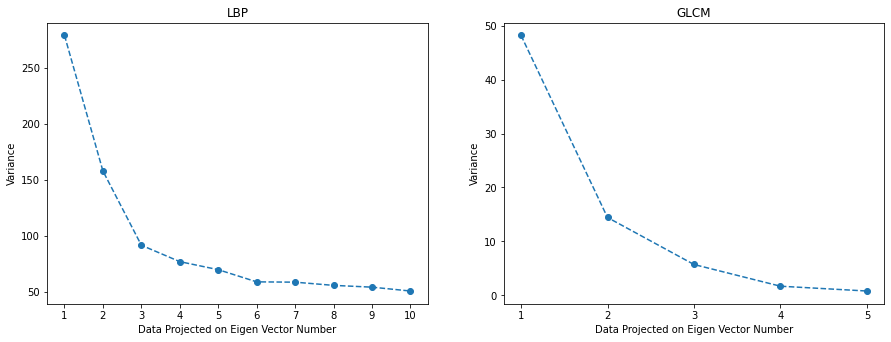

In [ ]:
pca_projection(pca_array,['LBP','GLCM'])

In [ ]:
model4 = train_model(norm_glcm_train, data_y, model_name='SVM', validation=(norm_glcm_val, test_y))

Validation Accuracy in 'SVM' = 0.8166491043203372
[[373 104]
 [ 70 402]]
Recall in 'SVM' = 0.7819706498951782
Precision in 'SVM' = 0.8419864559819413
F1 Score in 'SVM' = 0.8108695652173914


In [ ]:
model5 = train_model(norm_glcm_train, data_y, model_name='RF', validation=(norm_glcm_val, test_y))

Validation Accuracy in 'RF' = 0.8714436248682824
[[394  83]
 [ 39 433]]
Recall in 'RF' = 0.8259958071278826
Precision in 'RF' = 0.9099307159353349
F1 Score in 'RF' = 0.865934065934066


In [ ]:
model6 = train_model(norm_glcm_train, data_y, model_name='XGB', validation=(norm_glcm_val, test_y))

Validation Accuracy in 'XGB' = 0.8946259220231823
[[415  62]
 [ 38 434]]
Recall in 'XGB' = 0.870020964360587
Precision in 'XGB' = 0.9161147902869757
F1 Score in 'XGB' = 0.8924731182795699


In [ ]:
model7 = train_model(norm_glcm_train, data_y, model_name='KNN', validation=(norm_glcm_val, test_y))

Validation Accuracy in 'KNN' = 0.8840885142255005
[[408  69]
 [ 41 431]]
Recall in 'KNN' = 0.8553459119496856
Precision in 'KNN' = 0.9086859688195991
F1 Score in 'KNN' = 0.8812095032397408


In [ ]:
model = RandomForestClassifier(n_estimators=200, max_depth=10)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Accuracy
acc_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print("Accuracy: {:.2f}% ± {:.2f}".format(acc_scores.mean()*100, acc_scores.std()*100))

# Precision
precision_scores = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(precision_score, average='macro'))
print("Precision: {:.2f}% ± {:.2f}".format(precision_scores.mean()*100, precision_scores.std()*100))

# Recall
recall_scores = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(recall_score, average='macro'))
print("Recall: {:.2f}% ± {:.2f}".format(recall_scores.mean()*100, recall_scores.std()*100))

# F1-score
f1_scores = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(f1_score, average='macro'))
print("F1 Score: {:.2f}% ± {:.2f}".format(f1_scores.mean()*100, f1_scores.std()*100))

NameError: name 'X' is not defined